In [60]:
# %pip install pydicom
# %pip install opencv-python

In [61]:
from matplotlib import pyplot as plt
import os
import numpy as np
import pydicom
import CTimageLIB
import cv2
import imp
imp.reload(CTimageLIB)

<module 'CTimageLIB' from '/Users/jiewang/Desktop/3DHuman/CTimageLIB.py'>

In [62]:
# The main entrance of programme
if __name__ == "__main__":
    dataPath = "./dataset/brain/DICOM/IM_0002"
    dataset = CTimageLIB.readCT(dataPath=dataPath)

In [63]:
# Output the attributes of dicom
# for attr in dataset:
#     print(attr.name, "=", attr.value)

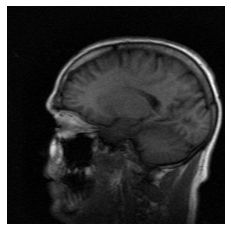

In [64]:
# Show the single image of CT dataset

# Check the avaliability of CT data
if 'PixelData' not in dataset:
    raise ValueError("DICOM file does not contain pixel data.")

# Acquire pixel data
pixels = dataset.pixel_array

# Show the image
plt.imshow(pixels, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

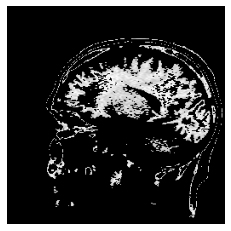

In [65]:
# Do the segmentation to extract the brain part
# Threshold segmentation
minThreshold = 150
maxThreshold = 200
brainImage = CTimageLIB.thresholdSegmentation(pixels=pixels,minThreshold=minThreshold,maxThreshold=maxThreshold)
plt.imshow(brainImage, cmap='gray')
plt.axis('off')
plt.show()

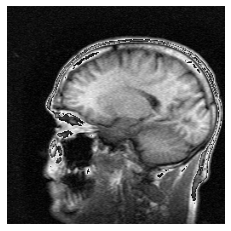

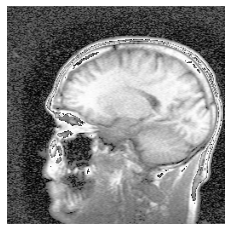

In [66]:
# Using histogram equalisation to enhance image contrast

# check the type of image
if pixels.dtype != np.uint8:
    gray_image = pixels.astype(np.uint8)

# histogram equalisation
equalized_image = cv2.equalizeHist(gray_image)

# show images
plt.imshow(gray_image, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

plt.imshow(equalized_image, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

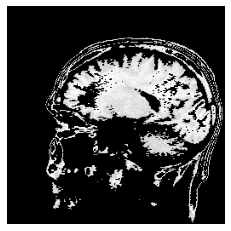

In [67]:
# Try the threshold segmentation on the processed image
minThreshold_processed = 190
maxThreshold_processed = 245
brainImage_thresholdProcessed = CTimageLIB.thresholdSegmentation(equalized_image,minThreshold_processed,maxThreshold_processed)
plt.imshow(brainImage_thresholdProcessed, cmap='gray')
plt.axis('off')
plt.show()

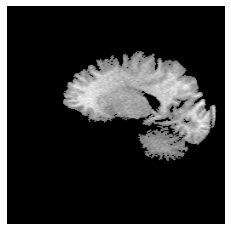

In [68]:
# Region growing method
regionGrowingImage = pixels
seedPoint = (100,100)
threshold = 95
brainImageRegionGrowing = CTimageLIB.regionGrowing(regionGrowingImage, seedPoint, threshold)
plt.imshow(brainImageRegionGrowing, cmap='gray')
plt.axis('off')
plt.show()

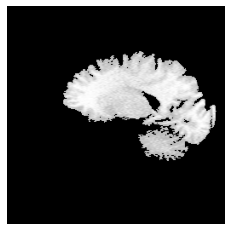

In [69]:
# Region growing method on equalized image
regionGrowingImageEqualized = equalized_image
seedPoint = (180,100)
threshold = 68
# seedPoint = (150,125)
# threshold = 35
brainImageRegionGrowingEqualized = CTimageLIB.regionGrowing(regionGrowingImageEqualized, seedPoint, threshold)
plt.imshow(brainImageRegionGrowingEqualized, cmap='gray')
plt.axis('off')
plt.show()

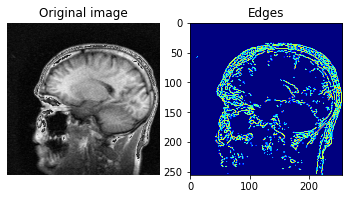

In [70]:
# Edge detection method
# Canny calculator
cannyImage = pixels
# check the type of image
if cannyImage.dtype != np.uint8:
    cannyImage = cannyImage.astype(np.uint8)
# cannyImage = cv2.equalizeHist(cannyImage)
edges = cv2.Canny(cannyImage,220,230)
plt.subplot(121)
plt.imshow(cannyImage,cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(122)
plt.imshow(edges,cmap='jet')
plt.title('Edges')
plt.show()
# print(cannyImage.shape)
# print(cannyImage)
# print(np.max(cannyImage))

(256, 256)


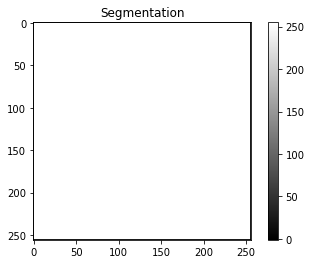

In [71]:
# Combined with the watershed
watershedImage = cv2.cvtColor(cannyImage, cv2.COLOR_GRAY2BGR)

#create the markers to record the result
markers = np.zeros_like(cannyImage, dtype=np.int32)     # the values of three channels are the same

# mark the edge as white, the value of background is 0
markers[edges != 0] = 255

# using the region growing method based on edge to do the segmentation
segmentation = cv2.watershed(watershedImage, markers)

print(segmentation.shape)
plt.imshow(segmentation, cmap='gray')
plt.title('Segmentation')
plt.colorbar()
plt.show()

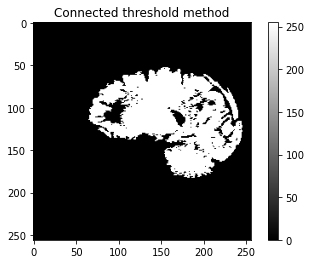

In [72]:
# Connected threshold method
# read the input image
image = pixels

# initialize the seed point and threshold
seed_point = (150, 125)
threshold = 50

# implement the connected threshold method
result = CTimageLIB.connected_threshold(image, seed_point, threshold)

# show the result
plt.imshow(result, cmap='gray')
plt.title('Connected threshold method')
plt.colorbar()
plt.show()

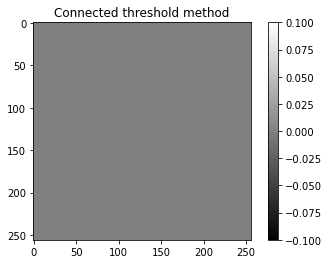

In [73]:
# Level set method
image = pixels

# 设置水平集方法的参数
iterations = 100
time_step = 0.1
lambda_val = -0.3
alpha_val = 1.0
epsilon_val = 2.0

# 应用水平集方法进行图像分割
result = CTimageLIB.levelset_segmentation(image, iterations, time_step, lambda_val, alpha_val, epsilon_val)

# show the result
plt.imshow(result, cmap='gray')
plt.title('Connected threshold method')
plt.colorbar()
plt.show()

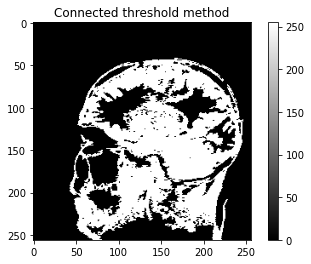

In [74]:
# Head bone
# Previous method
# Connected threshold method
# read the input image
image = pixels

# initialize the seed point and threshold
seed_point = (50, 200)
threshold = 60

# implement the connected threshold method
result = CTimageLIB.connected_threshold(image, seed_point, threshold)

# show the result
plt.imshow(result, cmap='gray')
plt.title('Connected threshold method')
plt.colorbar()
plt.show()

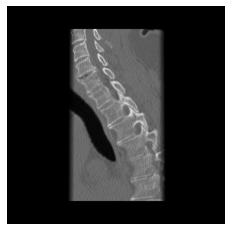

In [75]:
# Shoulder part

dataPath = "./dataset/shoulder CT 2019/IMAGES/IM000972"
dataset = CTimageLIB.readCT(dataPath=dataPath)

# Show the single image of CT dataset

# Check the avaliability of CT data
if 'PixelData' not in dataset:
    raise ValueError("DICOM file does not contain pixel data.")

# Acquire pixel data
pixels = dataset.pixel_array

# Show the image
plt.imshow(pixels, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

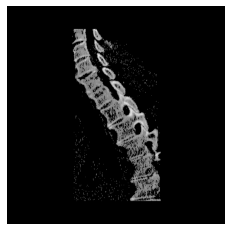

In [76]:
# Do the segmentation to extract the brain part
# Threshold segmentation
minThreshold = 1180
maxThreshold = 2567
brainImage = CTimageLIB.thresholdSegmentation(pixels=pixels,minThreshold=minThreshold,maxThreshold=maxThreshold)
plt.imshow(brainImage, cmap='gray')
plt.axis('off')
plt.show()

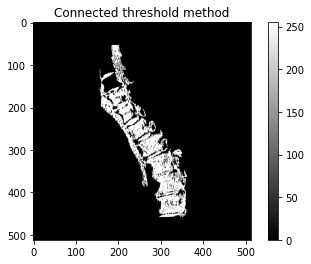

In [77]:
# Connected threshold method
# read the input image
image = pixels

# initialize the seed point and threshold
seed_point = (280, 280)
threshold = 165

# implement the connected threshold method
result = CTimageLIB.connected_threshold(image, seed_point, threshold)

# show the result
plt.imshow(result, cmap='gray')
plt.title('Connected threshold method')
plt.colorbar()
plt.show()

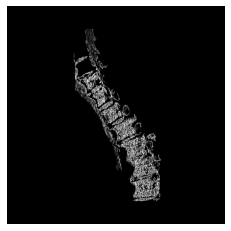

In [78]:
# Region growing method
regionGrowingImage = pixels
seedPoint = (280,280)
threshold = 165
brainImageRegionGrowing = CTimageLIB.regionGrowing(regionGrowingImage, seedPoint, threshold)
plt.imshow(brainImageRegionGrowing, cmap='gray')
plt.axis('off')
plt.show()